# Load Files

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Notebooks
import nbimporter
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Functions Notebook
from DCGAN import *
from Utils import build_GAN, batch_build_GAN, corr_matrix
from Functions import holisticsTrainTest
from Functions import comfPMV, ppv, selectModelParameters, trainTest_tunedModel, buildTrainRF, buildTrainKNN
from Functions import buildTrainSVM, buildTrainNB, buildMLP, getClfMetrics, saveModel

# Pandas, matplotlib, pickle, seaborn
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from collections import Counter

# Sklearn
from sklearn.manifold import TSNE
from sklearn import preprocessing

# Tensorflow
import tensorflow as tf

Importing Jupyter notebook from DCGAN.ipynb
Importing Jupyter notebook from Utils.ipynb
Importing Jupyter notebook from GAN.ipynb
Importing Jupyter notebook from Functions.ipynb


In [2]:
# Run the pre-processing notebook first to make sure the pickle files exist

df_feature1 = pd.read_pickle("df_feature1.pkl")
# df_feature2 = pd.read_pickle("df_feature2.pkl")
# df_feature3 = pd.read_pickle("df_feature3.pkl")
# df_feature4 = pd.read_pickle("df_feature4.pkl")
# df_feature5 = pd.read_pickle("df_feature5.pkl")


In [3]:
test_size_percentage = 0.2 # for CV within train split
train_test_split = 0.8 # for main train/validation split

user_split = True #split train and test user-based or completely stratfied

use_heuristics_participants = False


In [4]:
df_aux_65 = pd.read_csv("../data/TCS_65_participants_outsideData.csv", delimiter = ",")

list_complete_participants = list(df_aux_65['Participant_No'].unique())

if use_heuristics_participants:
    list_complete_participants.append(10)
    list_complete_participants.append(26)
    list_complete_participants.append(28)
    list_complete_participants.append(36)
    list_complete_participants.append(37)
    list_complete_participants.append(39)
    list_complete_participants.append(47)
    list_complete_participants.append(48)
    list_complete_participants.append(53)


num_complete_participants = len(list_complete_participants)
print("Complete Participants: {}".format(list_complete_participants))
print("Total number of complete participants: {}".format(num_complete_participants))

Complete Participants: [1, 2, 4, 5, 6, 7, 8, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Total number of complete participants: 65


In [5]:

df_feature1_train, df_feature1_test, df_feature1_train_binary, df_feature1_test_binary = holisticsTrainTest(df_feature1, 
                                                                                                            list_complete_participants,
                                                                                                            user_split = user_split,
                                                                                                            train_test_split = train_test_split)


# df_feature2_train, df_feature2_test, df_feature2_train_binary, df_feature2_test_binary  = holisticsTrainTest(df_feature2, 
#                                                                                                              list_complete_participants,
#                                                                                                             user_split = user_split,
#                                                                                                             train_test_split=train_test_split)

# df_feature3_train, df_feature3_test, df_feature3_train_binary, df_feature3_test_binary = holisticsTrainTest(df_feature3,
#                                                                                                            list_complete_participants,
#                                                                                                            user_split = user_split,
#                                                                                                            train_test_split=train_test_split)

# df_feature4_train, df_feature4_test, df_feature4_train_binary, df_feature4_test_binary = holisticsTrainTest(df_feature4,
#                                                                                                            list_complete_participants,
#                                                                                                            user_split = user_split,
#                                                                                                            train_test_split=train_test_split)

# df_feature5_train, df_feature5_test, df_feature5_train_binary, df_feature5_test_binary = holisticsTrainTest(df_feature5,
#                                                                                                             list_complete_participants,
#                                                                                                            user_split = user_split,
#                                                                                                            train_test_split=train_test_split)

print("Total number of instances: {}".format(df_feature1.shape[0]))

print("Number of training instances: {}".format(df_feature1_train.shape[0]))
print("Number of testing (validation) instances: {}".format(df_feature1_test.shape[0]))

Num participants in test set: 
Testing on participants:
[ 4 40 41 43 57 58 61 64 68 70 71 73 80]
Total number of instances: 2067
Number of training instances: 1713
Number of testing (validation) instances: 354


# Preparing data

In [6]:
# generate datasets for each class

print(df_feature1_train['Discrete Thermal Comfort_TA'].value_counts())
df_feature1_train_1 = df_feature1_train[df_feature1_train[ 'Discrete Thermal Comfort_TA'] == 1]  
del df_feature1_train_1['Discrete Thermal Comfort_TA']

df_feature1_train_2 = df_feature1_train[df_feature1_train[ 'Discrete Thermal Comfort_TA'] == 2]
del df_feature1_train_2['Discrete Thermal Comfort_TA']

df_feature1_train_minus1 = df_feature1_train[df_feature1_train[ 'Discrete Thermal Comfort_TA'] == -1]
del df_feature1_train_minus1['Discrete Thermal Comfort_TA']

df_feature1_train_minus2 = df_feature1_train[df_feature1_train[ 'Discrete Thermal Comfort_TA'] == -2]
del df_feature1_train_minus2['Discrete Thermal Comfort_TA']

 0    950
-1    353
-2    190
 1    176
 2     44
Name: Discrete Thermal Comfort_TA, dtype: int64


In [7]:
# X_embedded = TSNE(n_components=2).fit_transform(df_feature1_train_1)
# print(X_embedded)

In [8]:
# print(X_embedded[:,0])

# plt.scatter(X_embedded[:,0], X_embedded[:,1])


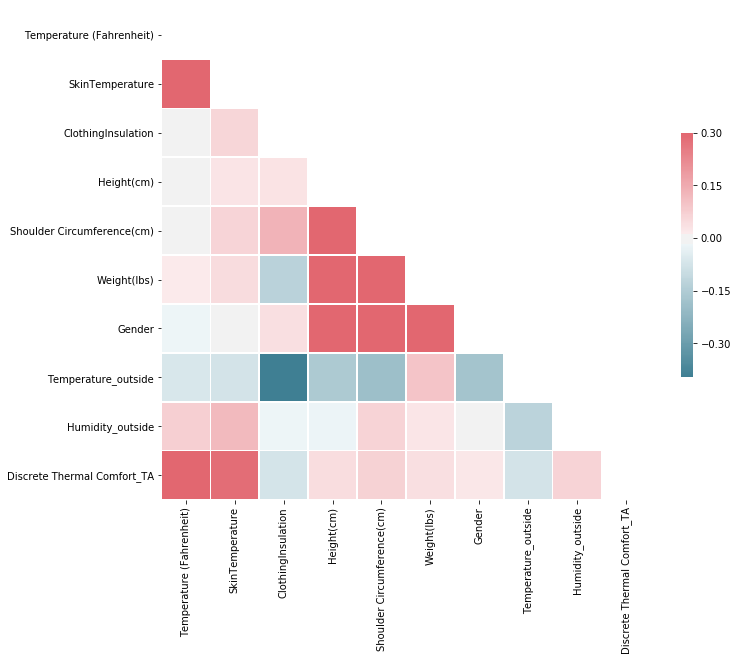

In [9]:
# Compute the correlation matrix
corr_real_1 = corr_matrix(df_feature1_train)

# GAN 

In [10]:
# # trained classification model
# acc_knn_1_train, knn_optimal_1 = buildTrainKNN(df_feature1_train_1,test_size_percentage=test_size_percentage)
# # test model
# acc_holistic_knn_1, _ = trainTest_tunedModel(df_feature1_test, knn_optimal_1)
# # 0.6


In [11]:
# define the metrics to compare the synth data

# run experiments to fund best architecture that maximizes good synth data

# have TCS classifier model ACC from occutherm as baseline, with new synth data
# re run the models and see if ACC increases

## Finding Architecture

In [23]:
EPOCHS = 1000

# build DCGAN
dcgan = DCGAN(n_features=df_feature1_train.shape[1])
dcgan.train(df_feature1_train, EPOCHS=EPOCHS)

# gen_df_list, loss_g_list, loss_d_list, parameters_list = batch_build_GAN(df_feature1_train_1, batch_parameters)


Synth Data shape= (640, 10)


/home/matias/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



In [19]:
synth_df = dcgan.generate_data(df_feature1_train)
print(synth_df)
print(synth_df['Discrete Thermal Comfort_TA'].value_counts())


Synth Data shape= (640, 10)
     Temperature (Fahrenheit)  SkinTemperature  ClothingInsulation  \
0                   73.696663        86.780952            0.580139   
1                   73.827301        87.135239            0.600695   
2                   70.714508        82.379265            0.436707   
3                   71.286156        83.070793            0.467827   
4                   71.995033        83.315796            0.478132   
5                   74.229713        90.200279            0.770145   
6                   73.651115        86.221466            0.577516   
7                   74.467102        89.946564            0.709744   
8                   74.626297        88.933365            0.670470   
9                   74.276382        88.400154            0.647678   
10                  73.602966        85.861938            0.545471   
11                  71.374985        83.408333            0.505325   
12                  70.428123        82.316162            0.44

/home/matias/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


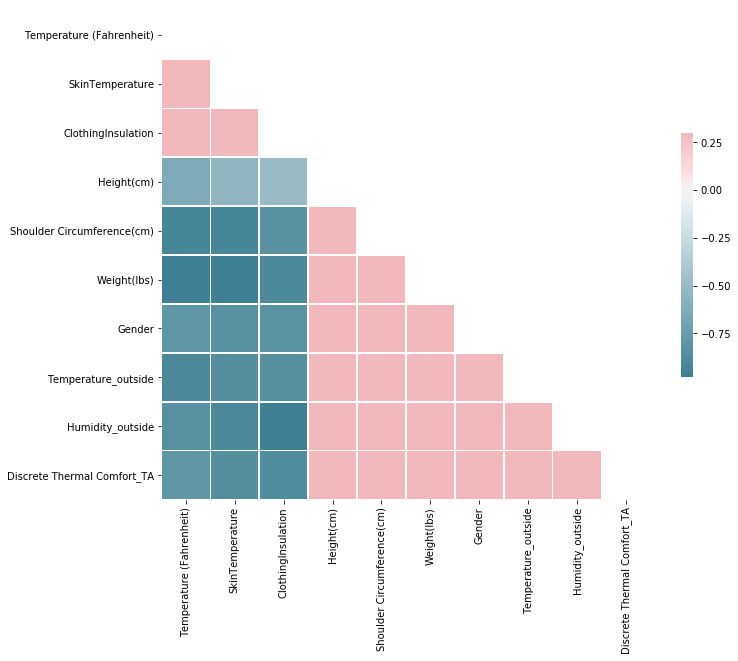

In [24]:
# Compute the correlation matrix
corr_synth_1 = corr_matrix(synth_df)


                             Temperature (Fahrenheit)  SkinTemperature  \
Temperature (Fahrenheit)                     0.000000        -0.451930   
SkinTemperature                             -0.451930         0.000000   
ClothingInsulation                          -0.842120        -0.892372   
Height(cm)                                   0.642472         0.575663   
Shoulder Circumference(cm)                   0.934596         0.986529   
Weight(lbs)                                  0.997096         1.009161   
Gender                                       0.773812         0.836773   
Temperature_outside                          0.842047         0.787957   
Humidity_outside                             0.906750         1.022662   
Discrete Thermal Comfort_TA                  1.406438         1.147840   

                             ClothingInsulation  Height(cm)  \
Temperature (Fahrenheit)              -0.842120    0.642472   
SkinTemperature                       -0.892372    0.575663

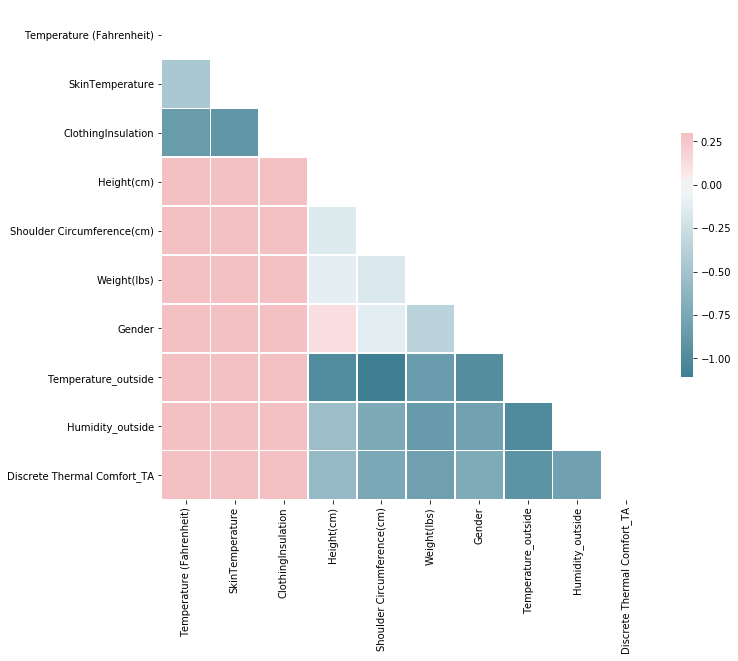

In [25]:
# substract corr matrices
corr_diff = corr_real_1 - corr_synth_1
print(corr_diff)

corr_diff = corr_matrix(None, get_corr=False, corr=corr_diff)